In [1]:
import wordcloud as wcl
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium as flm
from PIL import Image

In [15]:
wcl.__version__

'1.8.0'

In [16]:
alice_text = open("text/alice_novel.txt", "r").read()

In [17]:
print(alice_text[1000:1500])

ures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought


In [20]:
en_stopwords = wcl.STOPWORDS
word_cloud = wcl.WordCloud(
    background_color="white",
    max_words=200,
    stopwords=en_stopwords
)

In [22]:
word_cloud.generate(
    alice_text
)

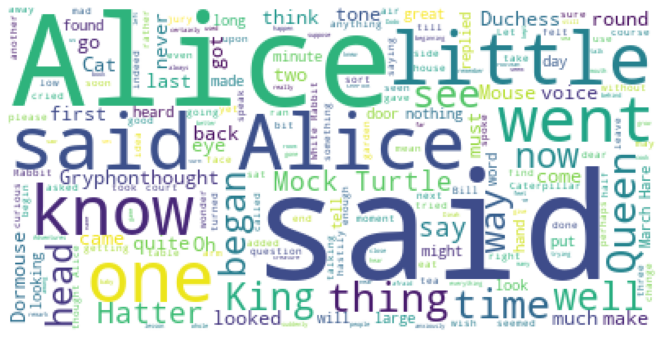

In [25]:
plt.figure(
    figsize=(12, 6)
)
plt.imshow(
    word_cloud
)
plt.axis("off")
plt.show()

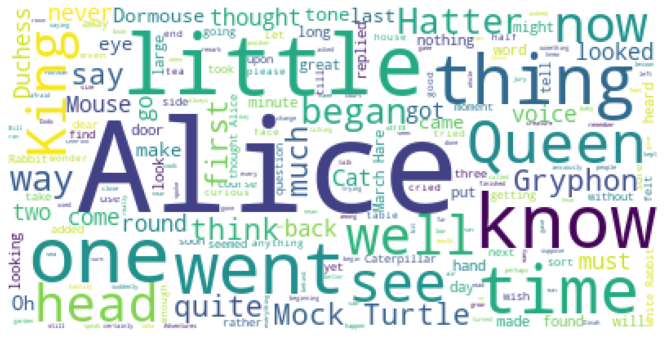

In [28]:
en_stopwords.add(
    "right"
)
word_cloud.generate(
    alice_text
)
plt.figure(
    figsize=(12, 6)
)
plt.imshow(
    word_cloud
)
plt.axis("off")
plt.show()

In [37]:
alice_img = Image.open("image/alice_mask.png")
alice_mask = np.array(alice_img)

In [40]:
alice_mask.shape

(900, 900)

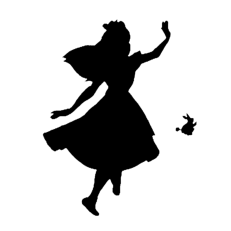

In [38]:
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

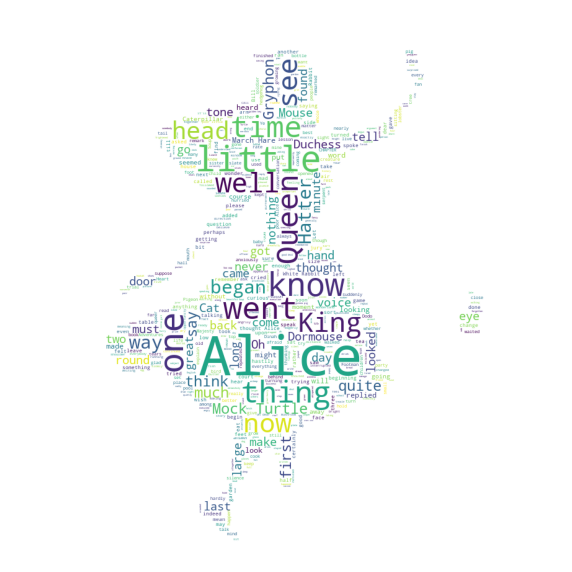

In [43]:
alice_wcl = wcl.WordCloud(
    background_color="white",
    max_words=3000,
    mask=alice_mask,
    stopwords=en_stopwords
)
alice_wcl.generate(alice_text)

plt.figure(
    figsize=(10, 20)
)
plt.imshow(alice_wcl)
plt.axis("off")
plt.show()

In [3]:
df_canada = pd.read_excel(
    "https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2
)

In [46]:
df_canada['total'] = df_canada.sum(axis=1)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [59]:
max_words = 100
text = ""
for country in df_canada.OdName.values:
    if len(country.split(" ")) == 1:
        repeat_num_times = int(round(
            df_canada.loc[
                df_canada['OdName']==country,
                "total"
            ] / float (df_canada['total'].sum()) * max_words
        ))
        text = text + ((country + ' ') * repeat_num_times)

In [60]:
text

'Afghanistan Algeria Bangladesh China China China China China China China China China Colombia Egypt Ethiopia France France Germany Guyana Haiti India India India India India India India India India India Iraq Israel Jamaica Jamaica Jordan Lebanon Lebanon Mexico Morocco Nigeria Pakistan Pakistan Pakistan Pakistan Peru Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania Somalia Ukraine '

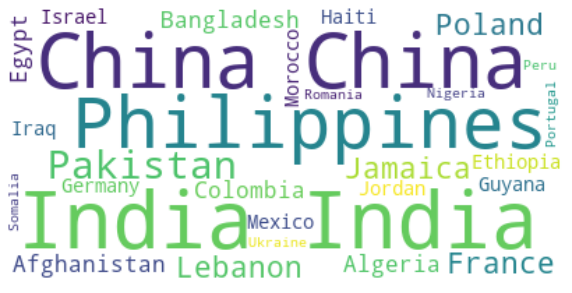

In [61]:
immigran_wc = wcl.WordCloud(
    background_color="white",   
).generate(text)
plt.figure(figsize=(10, 15))
plt.imshow(immigran_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total = df_total.reset_index()
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [5]:
plt.style.use("ggplot")
plt.figure(
    figsize=(10, 5)
)
sns.regplot(
    x="year",
    y="total",
    data=df_total,
    color="green",
)

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

In [7]:
bdg = flm.Map(location=(-6.9174639, 107.6191228), zoom_start=12)
bdg

In [3]:
sf_incidents = pd.read_csv("csv/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [9]:
sf_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
sf_lat = 37.77
sf_long = -122.42

sf_map = flm.Map(location=(sf_lat, sf_long), zoom_start=12)
sf_map

In [6]:
incident = flm.map.FeatureGroup()
subset_sf_incidents = sf_incidents.loc[:10]
for lat, long in zip(subset_sf_incidents.Y, subset_sf_incidents.X):
    incident.add_child(
        flm.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        )
    )
sf_map.add_child(incident)

In [ ]:
sf_map = flm.Map(
    (
        sf_lat,
        sf_long
    ),
    zoom_start=12
)
incident = flm.MarkerCluster().add_to(sf_map)

for lat, long, label in zip (
    subset_sf_incidents.Y, subset_sf_incidents.X, labels
):
    